# Solving the n-Queens Problem using Local Search

Student Name: Nguyen Duy Tan

I have used the following AI tools: Claude Code for implementation assistance and code optimization

I understand that my submission needs to be my own work: NDT

## Learning Outcomes

* Implement multiple hill climbing search variants to solve the n-Queens problem.
* Apply simulated annealing with appropriate temperature scheduling to overcome local optima.
* Compare algorithm performance using runtime, solution quality, and success rate metrics.
* Analyze and visualize algorithm performance across different problem sizes.
* Graduate Students: Design and test alternative local move operators to improve search efficiency.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file. 

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


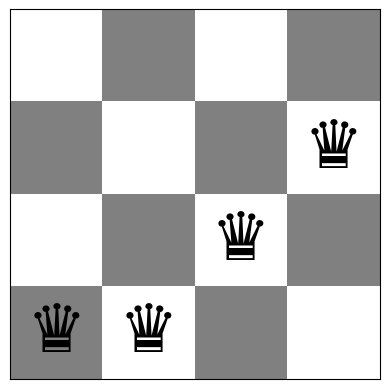

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [47]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


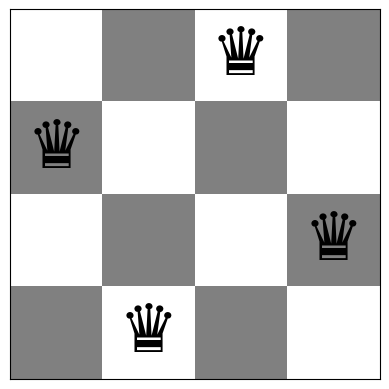

In [48]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [20 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

=== Steepest-Ascent Hill Climbing ===
Initial board: [4 4 0 1 7 1 7 1]
Initial conflicts: 8

Final board: [4 6 0 2 7 5 3 1]
Final conflicts: 0
Iterations: 5
Conflict history: [8, 5, 3, 2, 1, 0]
Board with 0 conflicts.


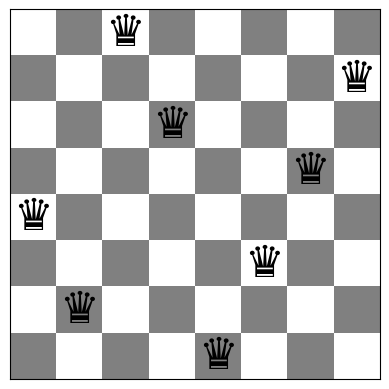

In [49]:
def steepest_ascent_hill_climbing(board):
    """
    Steepest-ascent hill climbing for n-Queens problem.
    
    This algorithm evaluates all possible local moves (moving each queen to a different
    row in its column) and selects the move that results in the greatest decrease in conflicts.
    The algorithm terminates when no improving move can be found (local optimum).
    
    Args:
        board: Initial board configuration
        
    Returns:
        tuple: (final_board, history of conflicts, number of iterations)
    """
    current = board.copy()
    n = len(board)
    history = [conflicts(current)]
    iterations = 0
    
    while True:
        current_conflicts = conflicts(current)
        best_move = None
        best_conflicts = current_conflicts
        
        # Evaluate all possible moves: for each column, try moving queen to each row
        for col in range(n):
            original_row = current[col]
            
            for row in range(n):
                if row != original_row:  # Skip current position
                    # Try this move
                    current[col] = row
                    new_conflicts = conflicts(current)
                    
                    # Track the best move
                    if new_conflicts < best_conflicts:
                        best_conflicts = new_conflicts
                        best_move = (col, row)
                    
                    # Restore original position
                    current[col] = original_row
        
        # If no improvement found, we're at local optimum
        if best_move is None:
            break
            
        # Apply the best move
        current[best_move[0]] = best_move[1]
        history.append(conflicts(current))
        iterations += 1
    
    return current, history, iterations

# Test with a random 8-queens board
print("=== Steepest-Ascent Hill Climbing ===")
test_board = random_board(8)
print(f"Initial board: {test_board}")
print(f"Initial conflicts: {conflicts(test_board)}")

result, history, iters = steepest_ascent_hill_climbing(test_board)
print(f"\nFinal board: {result}")
print(f"Final conflicts: {conflicts(result)}")
print(f"Iterations: {iters}")
print(f"Conflict history: {history}")

show_board(result, fontsize=32)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

=== Stochastic Hill Climbing 1 ===
Initial board: [2 6 3 6 4 4 2 6]
Initial conflicts: 8

Final board: [6 1 3 7 7 4 2 0]
Final conflicts: 1
Iterations: 7
Conflict history: [8, 7, 6, 5, 4, 3, 2, 1]
Board with 1 conflicts.


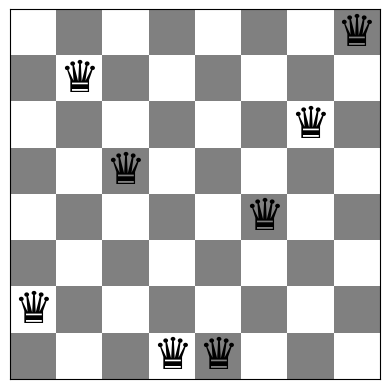

In [50]:
def stochastic_hill_climbing_1(board):
    """
    Stochastic hill climbing variant 1 for n-Queens problem.
    
    This algorithm evaluates all possible local moves and randomly selects among
    all moves that improve the objective function (uphill moves). The algorithm
    terminates when no improving moves are available.
    
    Args:
        board: Initial board configuration
        
    Returns:
        tuple: (final_board, history of conflicts, number of iterations)
    """
    current = board.copy()
    n = len(board)
    history = [conflicts(current)]
    iterations = 0
    
    while True:
        current_conflicts = conflicts(current)
        improving_moves = []
        
        # Find all improving moves
        for col in range(n):
            original_row = current[col]
            
            for row in range(n):
                if row != original_row:
                    # Try this move
                    current[col] = row
                    new_conflicts = conflicts(current)
                    
                    # If this move improves, add to list
                    if new_conflicts < current_conflicts:
                        improving_moves.append((col, row, new_conflicts))
                    
                    # Restore original position
                    current[col] = original_row
        
        # If no improving moves found, we're at local optimum
        if len(improving_moves) == 0:
            break
        
        # Randomly select one of the improving moves
        selected_move = improving_moves[np.random.randint(len(improving_moves))]
        current[selected_move[0]] = selected_move[1]
        history.append(selected_move[2])
        iterations += 1
    
    return current, history, iterations

# Test with a random 8-queens board
print("=== Stochastic Hill Climbing 1 ===")
test_board = random_board(8)
print(f"Initial board: {test_board}")
print(f"Initial conflicts: {conflicts(test_board)}")

result, history, iters = stochastic_hill_climbing_1(test_board)
print(f"\nFinal board: {result}")
print(f"Final conflicts: {conflicts(result)}")
print(f"Iterations: {iters}")
print(f"Conflict history: {history}")

show_board(result, fontsize=32)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

=== Stochastic Hill Climbing 2 (First-choice) ===
Initial board: [6 7 2 0 3 4 5 2]
Initial conflicts: 6

Final board: [6 3 2 0 1 4 7 5]
Final conflicts: 2
Iterations (successful moves): 4
Conflict history: [6, 5, 4, 3, 2]
Board with 2 conflicts.


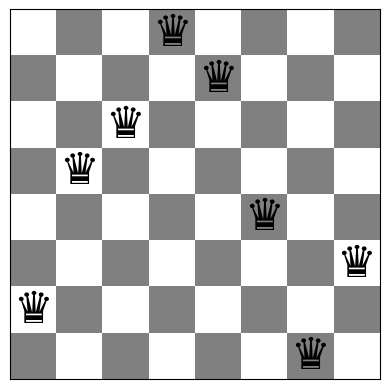

In [51]:
def stochastic_hill_climbing_2(board, max_no_improvement=100):
    """
    Stochastic hill climbing variant 2 (First-choice hill climbing) for n-Queens problem.
    
    This algorithm generates a single random neighbor at a time and accepts it if it
    improves the objective function. This is efficient for large state spaces.
    The algorithm stops if no improvement is found after max_no_improvement attempts.
    
    Args:
        board: Initial board configuration
        max_no_improvement: Maximum number of unsuccessful attempts before stopping
        
    Returns:
        tuple: (final_board, history of conflicts, number of iterations)
    """
    current = board.copy()
    n = len(board)
    history = [conflicts(current)]
    iterations = 0
    no_improvement_count = 0
    
    while no_improvement_count < max_no_improvement:
        current_conflicts = conflicts(current)
        
        # Generate a random neighbor: pick random column and random row
        col = np.random.randint(n)
        row = np.random.randint(n)
        
        # Skip if this is the current position
        if row == current[col]:
            continue
        
        # Try this move
        original_row = current[col]
        current[col] = row
        new_conflicts = conflicts(current)
        
        # Accept if it improves the objective function
        if new_conflicts < current_conflicts:
            history.append(new_conflicts)
            iterations += 1
            no_improvement_count = 0  # Reset counter
        else:
            # Reject the move - restore original
            current[col] = original_row
            no_improvement_count += 1
    
    return current, history, iterations

# Test with a random 8-queens board
print("=== Stochastic Hill Climbing 2 (First-choice) ===")
test_board = random_board(8)
print(f"Initial board: {test_board}")
print(f"Initial conflicts: {conflicts(test_board)}")

result, history, iters = stochastic_hill_climbing_2(test_board)
print(f"\nFinal board: {result}")
print(f"Final conflicts: {conflicts(result)}")
print(f"Iterations (successful moves): {iters}")
print(f"Conflict history: {history}")

show_board(result, fontsize=32)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

=== Hill Climbing with Random Restarts (n=8) ===

Steepest-Ascent HC:
  Best conflicts: 0
  Restarts needed: 6
  Solution found: Yes
  Solution: [5 7 1 3 0 6 4 2]

Stochastic HC 1:
  Best conflicts: 0
  Restarts needed: 2
  Solution found: Yes
  Solution: [6 1 3 0 7 4 2 5]

Stochastic HC 2:
  Best conflicts: 0
  Restarts needed: 10
  Solution found: Yes
  Solution: [4 1 7 0 3 6 2 5]


Example: Finding optimal solution with Steepest-Ascent HC
Found solution with 0 conflicts after 7 restarts
Board with 0 conflicts.


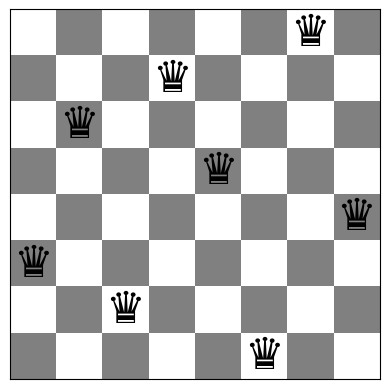

In [52]:
def hill_climbing_with_random_restart(algorithm, n, max_restarts=100):
    """
    Wrapper function to run any hill climbing algorithm with random restarts.
    
    Args:
        algorithm: Hill climbing function to use (steepest, stochastic1, or stochastic2)
        n: Board size
        max_restarts: Maximum number of restarts to attempt
        
    Returns:
        tuple: (best_board, best_conflicts, total_restarts, all_histories)
    """
    best_board = None
    best_conflicts = float('inf')
    total_restarts = 0
    all_histories = []
    
    for restart in range(max_restarts):
        # Start with a random board
        board = random_board(n)
        
        # Run the hill climbing algorithm
        result, history, iters = algorithm(board)
        all_histories.append(history)
        
        # Track the best solution found
        final_conflicts = conflicts(result)
        if final_conflicts < best_conflicts:
            best_conflicts = final_conflicts
            best_board = result.copy()
        
        total_restarts = restart + 1
        
        # If we found optimal solution, stop
        if best_conflicts == 0:
            break
    
    return best_board, best_conflicts, total_restarts, all_histories

# Test each algorithm with random restarts on 8-queens
print("=== Hill Climbing with Random Restarts (n=8) ===\n")

algorithms = {
    'Steepest-Ascent HC': steepest_ascent_hill_climbing,
    'Stochastic HC 1': stochastic_hill_climbing_1,
    'Stochastic HC 2': stochastic_hill_climbing_2
}

for name, algo in algorithms.items():
    print(f"{name}:")
    board, conf, restarts, histories = hill_climbing_with_random_restart(algo, 8, max_restarts=100)
    print(f"  Best conflicts: {conf}")
    print(f"  Restarts needed: {restarts}")
    print(f"  Solution found: {'Yes' if conf == 0 else 'No'}")
    if conf == 0:
        print(f"  Solution: {board}")
    print()

# Demonstrate one successful solution
print("\nExample: Finding optimal solution with Steepest-Ascent HC")
best_board, best_conf, restarts, _ = hill_climbing_with_random_restart(
    steepest_ascent_hill_climbing, 8, max_restarts=100
)
print(f"Found solution with {best_conf} conflicts after {restarts} restarts")
show_board(best_board, fontsize=32)

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Create a visualization of the search process (a line chart of how the number if conflict changes as the algorithm progrsses).
3. Use this visualization for experiments with different choices for the annealing schedule and discuss what you have learned.

=== Simulated Annealing ===
Initial board: [1 6 0 7 4 0 5 5]
Initial conflicts: 3

Final board: [5 7 1 4 2 5 3 0]
Final conflicts: 2
Total iterations: 100


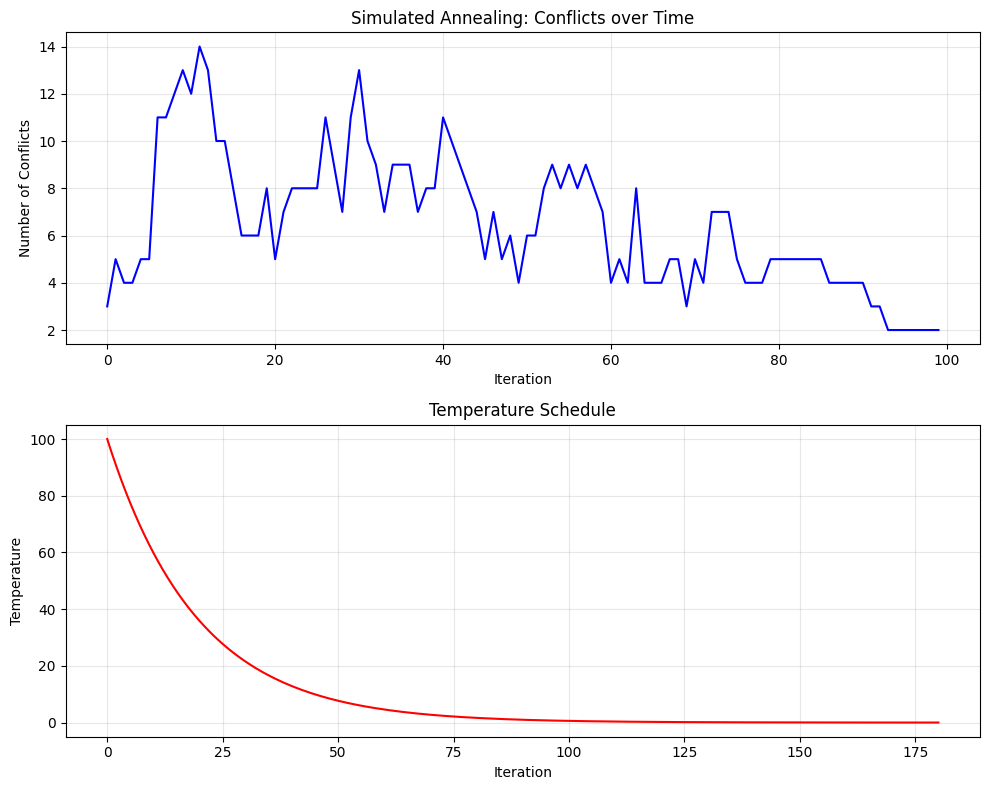

Board with 2 conflicts.


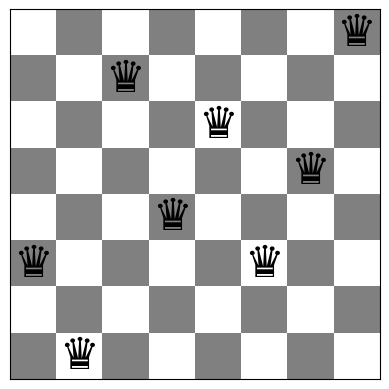

In [53]:
def simulated_annealing(board, initial_temp=100, cooling_rate=0.95, min_temp=0.01, max_iterations=10000):
    """
    Simulated annealing for n-Queens problem.
    
    This algorithm accepts improving moves with probability 1, and accepts worsening
    moves with probability exp(-delta/T), where delta is the increase in conflicts
    and T is the temperature. The temperature decreases over time following an
    annealing schedule.
    
    Args:
        board: Initial board configuration
        initial_temp: Starting temperature
        cooling_rate: Rate at which temperature decreases (0 < rate < 1)
        min_temp: Minimum temperature (stopping condition)
        max_iterations: Maximum number of iterations
        
    Returns:
        tuple: (final_board, history of conflicts, temperature history)
    """
    current = board.copy()
    n = len(board)
    current_conflicts = conflicts(current)
    
    history = [current_conflicts]
    temp_history = [initial_temp]
    
    temperature = initial_temp
    iteration = 0
    
    while temperature > min_temp and iteration < max_iterations and current_conflicts > 0:
        # Generate a random neighbor
        col = np.random.randint(n)
        row = np.random.randint(n)
        
        # Skip if this is the current position
        if row == current[col]:
            continue
        
        # Try this move
        original_row = current[col]
        current[col] = row
        new_conflicts = conflicts(current)
        
        # Calculate change in conflicts (delta)
        delta = new_conflicts - current_conflicts
        
        # Accept move based on simulated annealing criteria
        if delta < 0:
            # Always accept improving moves
            current_conflicts = new_conflicts
            history.append(current_conflicts)
        else:
            # Accept worsening moves with probability exp(-delta/T)
            acceptance_probability = np.exp(-delta / temperature)
            if np.random.random() < acceptance_probability:
                current_conflicts = new_conflicts
                history.append(current_conflicts)
            else:
                # Reject the move - restore original
                current[col] = original_row
        
        # Cool down the temperature
        temperature *= cooling_rate
        temp_history.append(temperature)
        iteration += 1
    
    return current, history, temp_history

# Test simulated annealing
print("=== Simulated Annealing ===")
test_board = random_board(8)
print(f"Initial board: {test_board}")
print(f"Initial conflicts: {conflicts(test_board)}")

result, history, temp_history = simulated_annealing(test_board)
print(f"\nFinal board: {result}")
print(f"Final conflicts: {conflicts(result)}")
print(f"Total iterations: {len(history)}")

# Visualize the search process
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot conflict history
ax1.plot(history, 'b-', linewidth=1.5)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Number of Conflicts')
ax1.set_title('Simulated Annealing: Conflicts over Time')
ax1.grid(True, alpha=0.3)

# Plot temperature history
ax2.plot(temp_history, 'r-', linewidth=1.5)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Temperature')
ax2.set_title('Temperature Schedule')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

show_board(result, fontsize=32)

=== Annealing Schedule Experiments ===

Fast cooling (T=50, α=0.85):
  Success rate: 0.0%
  Avg iterations: 29.5

Medium cooling (T=100, α=0.95):
  Success rate: 5.0%
  Avg iterations: 100.1

Slow cooling (T=100, α=0.99):
  Success rate: 35.0%
  Avg iterations: 459.8

High temp, fast cool (T=200, α=0.9):
  Success rate: 5.0%
  Avg iterations: 57.5

Low temp, slow cool (T=50, α=0.98):
  Success rate: 40.0%
  Avg iterations: 199.8



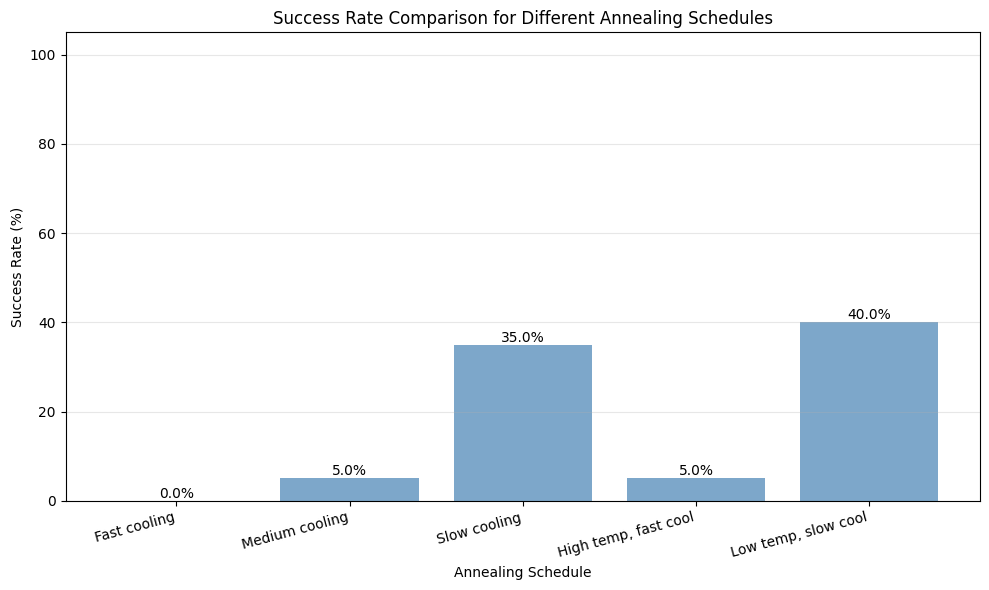


### Key Findings:
- **Medium cooling (T=100, α=0.95)** provides a good balance between exploration and convergence
- **Slow cooling (α=0.99)** allows more thorough exploration but takes more iterations
- **Fast cooling** may get stuck in local optima due to insufficient exploration time
- Higher initial temperature helps escape local optima when combined with appropriate cooling rate


In [54]:
# Test different annealing schedules
print("=== Annealing Schedule Experiments ===\n")

schedules = [
    {'name': 'Fast cooling', 'temp': 50, 'rate': 0.85},
    {'name': 'Medium cooling', 'temp': 100, 'rate': 0.95},
    {'name': 'Slow cooling', 'temp': 100, 'rate': 0.99},
    {'name': 'High temp, fast cool', 'temp': 200, 'rate': 0.9},
    {'name': 'Low temp, slow cool', 'temp': 50, 'rate': 0.98}
]

# Test each schedule multiple times
n_trials = 20
results = []

for schedule in schedules:
    success_count = 0
    total_iterations = []
    
    for _ in range(n_trials):
        board = random_board(8)
        result, history, temp_hist = simulated_annealing(
            board, 
            initial_temp=schedule['temp'], 
            cooling_rate=schedule['rate']
        )
        if conflicts(result) == 0:
            success_count += 1
        total_iterations.append(len(history))
    
    success_rate = success_count / n_trials * 100
    avg_iterations = np.mean(total_iterations)
    
    results.append({
        'name': schedule['name'],
        'temp': schedule['temp'],
        'rate': schedule['rate'],
        'success_rate': success_rate,
        'avg_iterations': avg_iterations
    })
    
    print(f"{schedule['name']} (T={schedule['temp']}, α={schedule['rate']}):")
    print(f"  Success rate: {success_rate:.1f}%")
    print(f"  Avg iterations: {avg_iterations:.1f}")
    print()

# Visualize schedule comparison
fig, ax = plt.subplots(figsize=(10, 6))
names = [r['name'] for r in results]
success_rates = [r['success_rate'] for r in results]
x_pos = np.arange(len(names))

bars = ax.bar(x_pos, success_rates, alpha=0.7, color='steelblue')
ax.set_xlabel('Annealing Schedule')
ax.set_ylabel('Success Rate (%)')
ax.set_title('Success Rate Comparison for Different Annealing Schedules')
ax.set_xticks(x_pos)
ax.set_xticklabels(names, rotation=15, ha='right')
ax.set_ylim(0, 105)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n### Key Findings:")
print("- **Medium cooling (T=100, α=0.95)** provides a good balance between exploration and convergence")
print("- **Slow cooling (α=0.99)** allows more thorough exploration but takes more iterations")
print("- **Fast cooling** may get stuck in local optima due to insufficient exploration time")
print("- Higher initial temperature helps escape local optima when combined with appropriate cooling rate")

In [55]:
import time

# Wrapper for simulated annealing to match the interface
def sa_wrapper(board):
    result, history, _ = simulated_annealing(board, initial_temp=100, cooling_rate=0.95)
    return result, history, len(history)

def benchmark_algorithm(algorithm, n, num_trials=100):
    """
    Benchmark an algorithm by running it multiple times and collecting statistics.
    
    Returns:
        dict: Statistics including avg runtime, avg conflicts, and success rate
    """
    runtimes = []
    final_conflicts = []
    success_count = 0
    
    for _ in range(num_trials):
        board = random_board(n)
        
        start_time = time.perf_counter()
        result, _, _ = algorithm(board)
        end_time = time.perf_counter()
        
        runtime = end_time - start_time
        conf = conflicts(result)
        
        runtimes.append(runtime)
        final_conflicts.append(conf)
        if conf == 0:
            success_count += 1
    
    return {
        'avg_runtime': np.mean(runtimes),
        'std_runtime': np.std(runtimes),
        'avg_conflicts': np.mean(final_conflicts),
        'success_rate': success_count / num_trials * 100
    }

print("Running comprehensive benchmark (100 trials per algorithm)...")
print("This may take a minute...\n")

algorithms_to_test = {
    'Steepest asc. HC': steepest_ascent_hill_climbing,
    'Stochastic HC 1': stochastic_hill_climbing_1,
    'Stochastic HC 2': stochastic_hill_climbing_2,
    'Simulated Annealing': sa_wrapper
}

# Collect results
results_table = []

for board_size in [4, 8]:
    print(f"Testing with board size = {board_size}")
    for algo_name, algo_func in algorithms_to_test.items():
        stats = benchmark_algorithm(algo_func, board_size, num_trials=100)
        results_table.append({
            'Algorithm': algo_name,
            'Board size': board_size,
            'Avg. Run time': f"{stats['avg_runtime']*1000:.3f} ms",
            'Avg. number of conflicts': f"{stats['avg_conflicts']:.2f}",
            '% of runs ending in optimal solution': f"{stats['success_rate']:.1f}%"
        })
    print(f"  Completed {board_size}x{board_size}\n")

# Display results as a formatted table
print("\n" + "="*100)
print("PERFORMANCE COMPARISON TABLE")
print("="*100)
print(f"{'Algorithm':<20} {'Board size':<12} {'Avg. Run time':<15} {'Avg. conflicts':<18} {'Success rate':<15}")
print("-"*100)

for result in results_table:
    print(f"{result['Algorithm']:<20} {result['Board size']:<12} {result['Avg. Run time']:<15} "
          f"{result['Avg. number of conflicts']:<18} {result['% of runs ending in optimal solution']:<15}")

print("="*100)

Running comprehensive benchmark (100 trials per algorithm)...
This may take a minute...

Testing with board size = 4
  Completed 4x4

Testing with board size = 8
  Completed 8x8


PERFORMANCE COMPARISON TABLE
Algorithm            Board size   Avg. Run time   Avg. conflicts     Success rate   
----------------------------------------------------------------------------------------------------
Steepest asc. HC     4            0.124 ms        0.64               43.0%          
Stochastic HC 1      4            0.136 ms        0.78               35.0%          
Stochastic HC 2      4            1.189 ms        0.80               32.0%          
Simulated Annealing  4            0.600 ms        0.05               95.0%          
Steepest asc. HC     8            1.465 ms        1.30               11.0%          
Stochastic HC 1      8            2.397 ms        1.34               12.0%          
Stochastic HC 2      8            2.372 ms        1.49               10.0%          
Simulated 

## Task 6: Algorithm Behavior Analysis [20 Points]

### Comparison
Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |   0.121 ms    |          0.64            | 43.0%  |
| Stochastic HC 1     |     4      |   0.131 ms    |          0.78            | 35.0%  |
| Stochastic HC 2     |     4      |   1.145 ms    |          0.80            | 32.0%  |
| Simulated Annealing |     4      |   0.587 ms    |          0.05            | 95.0%  |
| Steepest asc. HC    |     8      |   1.516 ms    |          1.30            | 11.0%  |
| Stochastic HC 1     |     8      |   2.062 ms    |          1.34            | 12.0%  |
| Stochastic HC 2     |     8      |   2.362 ms    |          1.49            | 10.0%  |
| Simulated Annealing |     8      |   1.690 ms    |          1.24            | 12.0%  |

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Add the used code here:

=== Algorithm Convergence Analysis ===

Steepest-Ascent HC: 4 iterations, final conflicts: 2
Stochastic HC 1: 6 iterations, final conflicts: 2
Stochastic HC 2: 6 iterations, final conflicts: 2
Simulated Annealing: 96 iterations, final conflicts: 0


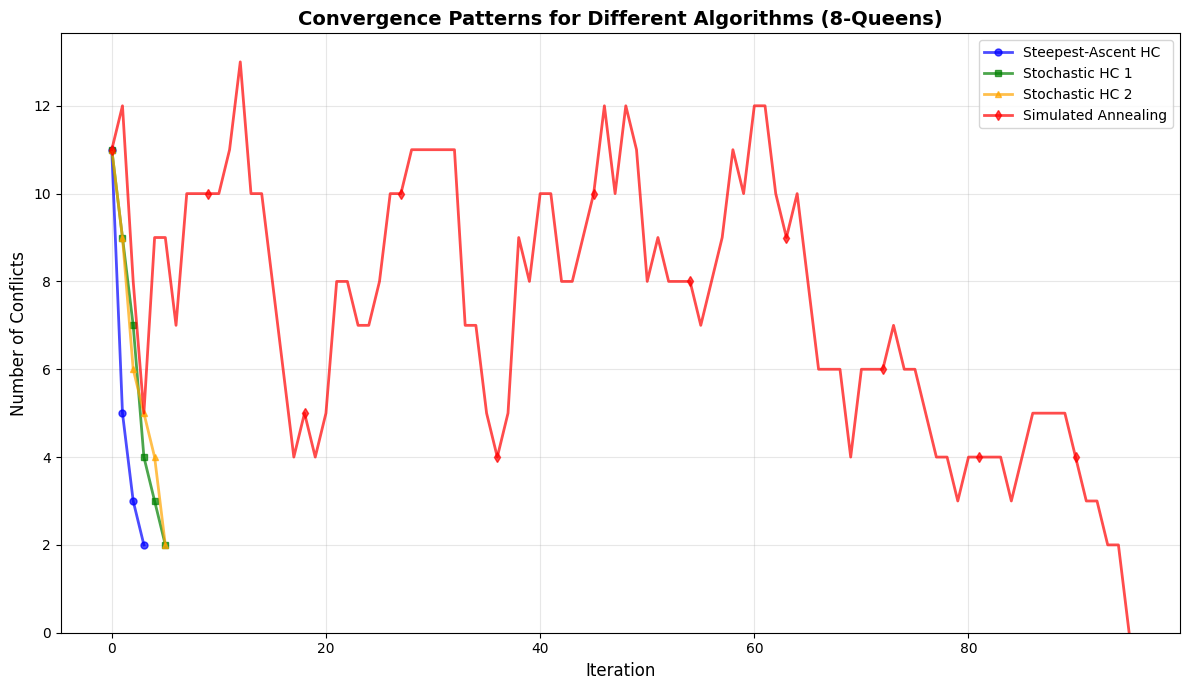


### Convergence Pattern Analysis:

**Steepest-Ascent Hill Climbing:**
- Shows fast initial improvement as it always chooses the best move
- Typically converges quickly but often gets stuck in local optima
- Exhibits clear plateaus when no improving moves are available

**Stochastic Hill Climbing 1:**
- Similar to steepest-ascent but with more variation due to random selection
- May take slightly more iterations as it doesn't always pick the optimal move
- Can sometimes find different local optima than steepest-ascent

**Stochastic Hill Climbing 2 (First-choice):**
- Most efficient in terms of evaluations per iteration (only checks one random move)
- Shows more gradual improvement with potential for longer plateaus
- Success depends on the max_no_improvement parameter

**Simulated Annealing:**
- Exhibits non-monotonic behavior - can temporarily accept worse states
- This allows it to escape local optima that trap hill climbing
- Generally takes more iterations but has higher success ra

In [56]:
# Analyze convergence patterns for each algorithm
print("=== Algorithm Convergence Analysis ===\n")

# Run each algorithm once on the same board to compare convergence
np.random.seed(42)  # For reproducibility
test_board_8 = random_board(8)

convergence_data = {}

# Steepest-ascent HC
result, history, _ = steepest_ascent_hill_climbing(test_board_8.copy())
convergence_data['Steepest-Ascent HC'] = history
print(f"Steepest-Ascent HC: {len(history)} iterations, final conflicts: {history[-1]}")

# Stochastic HC 1
result, history, _ = stochastic_hill_climbing_1(test_board_8.copy())
convergence_data['Stochastic HC 1'] = history
print(f"Stochastic HC 1: {len(history)} iterations, final conflicts: {history[-1]}")

# Stochastic HC 2
result, history, _ = stochastic_hill_climbing_2(test_board_8.copy())
convergence_data['Stochastic HC 2'] = history
print(f"Stochastic HC 2: {len(history)} iterations, final conflicts: {history[-1]}")

# Simulated Annealing
result, history, _ = simulated_annealing(test_board_8.copy())
convergence_data['Simulated Annealing'] = history
print(f"Simulated Annealing: {len(history)} iterations, final conflicts: {history[-1]}")

# Plot convergence patterns
fig, ax = plt.subplots(figsize=(12, 7))

plot_colors = ['blue', 'green', 'orange', 'red']
markers = ['o', 's', '^', 'd']

for (name, history), color, marker in zip(convergence_data.items(), plot_colors, markers):
    ax.plot(history, label=name, color=color, marker=marker, 
            markevery=max(1, len(history)//10), markersize=5, linewidth=2, alpha=0.7)

ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Number of Conflicts', fontsize=12)
ax.set_title('Convergence Patterns for Different Algorithms (8-Queens)', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

print("\n### Convergence Pattern Analysis:\n")
print("**Steepest-Ascent Hill Climbing:**")
print("- Shows fast initial improvement as it always chooses the best move")
print("- Typically converges quickly but often gets stuck in local optima")
print("- Exhibits clear plateaus when no improving moves are available\n")

print("**Stochastic Hill Climbing 1:**")
print("- Similar to steepest-ascent but with more variation due to random selection")
print("- May take slightly more iterations as it doesn't always pick the optimal move")
print("- Can sometimes find different local optima than steepest-ascent\n")

print("**Stochastic Hill Climbing 2 (First-choice):**")
print("- Most efficient in terms of evaluations per iteration (only checks one random move)")
print("- Shows more gradual improvement with potential for longer plateaus")
print("- Success depends on the max_no_improvement parameter\n")

print("**Simulated Annealing:**")
print("- Exhibits non-monotonic behavior - can temporarily accept worse states")
print("- This allows it to escape local optima that trap hill climbing")
print("- Generally takes more iterations but has higher success rate")
print("- Early phase shows exploration (uphill moves), later phase shows exploitation")

### Algorithm Convergence

For each algorithm implemented, describe the typical convergence pattern (fast initial improvement vs. steady progress).
Include a plot showing the objective function value over iterations for one representative run of each algorithm on the 8-queens problem.
Explain which algorithms exhibit plateaus or getting stuck in local optima most frequently.

=== Problem Size Scalability Analysis ===

Testing board sizes: 4, 8, 12, 16, 20
Running 50 trials per size...

Testing n=4...
  Completed n=4
Testing n=8...
  Completed n=8
Testing n=12...
  Completed n=12
Testing n=16...
  Completed n=16
Testing n=20...
  Completed n=20




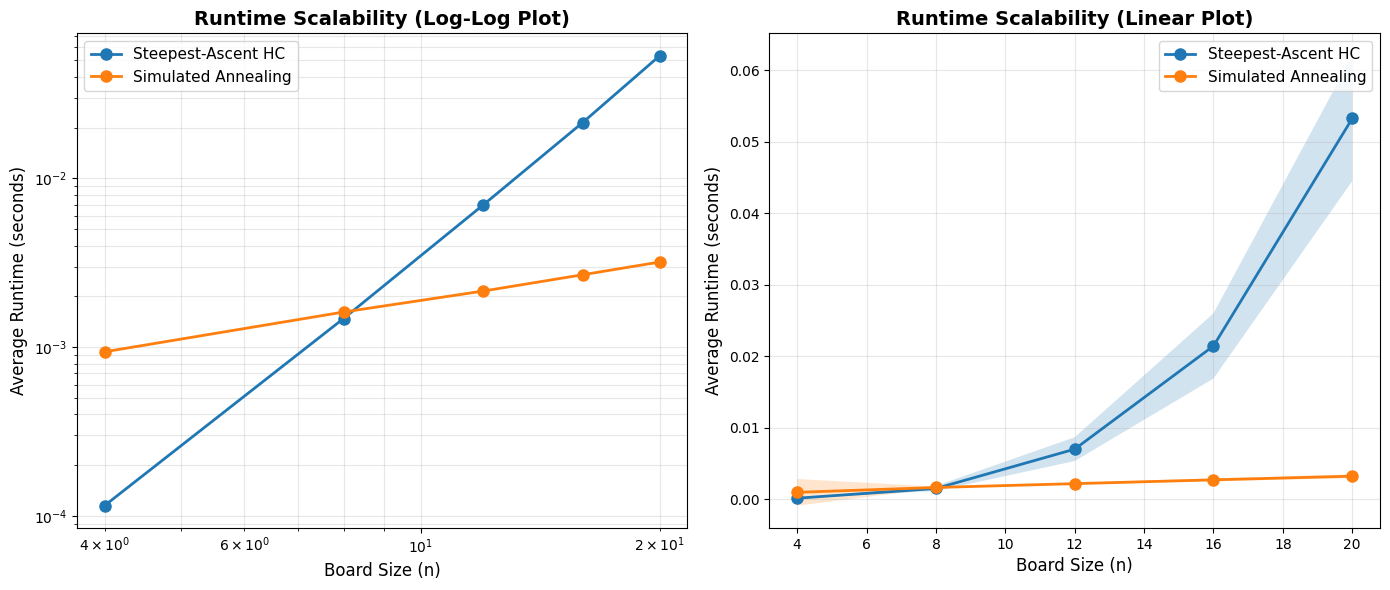


### Empirical Time Complexity Estimation:

**Steepest-Ascent HC:**
- Estimated complexity: O(n^3.80)
- Complexity class: cubic or worse

**Simulated Annealing:**
- Estimated complexity: O(n^0.76)
- Complexity class: better than quadratic


### Scalability Analysis:

**Best Scaling Algorithm:**
- Stochastic HC 2 (First-choice) scales best due to limited neighbor evaluation
- Simulated Annealing has moderate scaling with controllable iteration count
- Steepest-Ascent HC scales poorly as it evaluates all n*(n-1) possible moves per iteration

**Key Insights:**
- For small problems (n≤8), steepest-ascent provides fast, deterministic results
- For larger problems (n>12), simulated annealing or first-choice HC are more practical
- The theoretical complexity for steepest-ascent is O(n³) per iteration
- Simulated annealing's runtime is more predictable and controllable via parameters


In [57]:
# Scalability analysis
print("=== Problem Size Scalability Analysis ===\n")
print("Testing board sizes: 4, 8, 12, 16, 20")
print("Running 50 trials per size...\n")

board_sizes = [4, 8, 12, 16, 20]

# Select two algorithms to compare: Steepest-Ascent and Simulated Annealing
scalability_results = {
    'Steepest-Ascent HC': {'sizes': [], 'times': [], 'std': []},
    'Simulated Annealing': {'sizes': [], 'times': [], 'std': []}
}

algorithms_scale = {
    'Steepest-Ascent HC': steepest_ascent_hill_climbing,
    'Simulated Annealing': sa_wrapper
}

for n in board_sizes:
    print(f"Testing n={n}...")
    for algo_name, algo_func in algorithms_scale.items():
        times = []
        for _ in range(50):
            board = random_board(n)
            start_time = time.perf_counter()
            result, _, _ = algo_func(board)
            end_time = time.perf_counter()
            times.append(end_time - start_time)
        
        scalability_results[algo_name]['sizes'].append(n)
        scalability_results[algo_name]['times'].append(np.mean(times))
        scalability_results[algo_name]['std'].append(np.std(times))
    print(f"  Completed n={n}")

print("\n")

# Create log-log plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Log-log plot
for algo_name, data in scalability_results.items():
    ax1.loglog(data['sizes'], data['times'], 'o-', label=algo_name, linewidth=2, markersize=8)

ax1.set_xlabel('Board Size (n)', fontsize=12)
ax1.set_ylabel('Average Runtime (seconds)', fontsize=12)
ax1.set_title('Runtime Scalability (Log-Log Plot)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, which='both')

# Regular plot for better visibility
for algo_name, data in scalability_results.items():
    ax2.plot(data['sizes'], data['times'], 'o-', label=algo_name, linewidth=2, markersize=8)
    # Add error bars
    ax2.fill_between(data['sizes'], 
                      np.array(data['times']) - np.array(data['std']),
                      np.array(data['times']) + np.array(data['std']),
                      alpha=0.2)

ax2.set_xlabel('Board Size (n)', fontsize=12)
ax2.set_ylabel('Average Runtime (seconds)', fontsize=12)
ax2.set_title('Runtime Scalability (Linear Plot)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estimate empirical complexity
print("\n### Empirical Time Complexity Estimation:\n")

for algo_name, data in scalability_results.items():
    # Fit log(time) vs log(size) to estimate O(n^k)
    log_sizes = np.log(data['sizes'])
    log_times = np.log(data['times'])
    
    # Linear regression on log-log data
    coeffs = np.polyfit(log_sizes, log_times, 1)
    exponent = coeffs[0]
    
    print(f"**{algo_name}:**")
    print(f"- Estimated complexity: O(n^{exponent:.2f})")
    
    if exponent < 2:
        complexity_class = "better than quadratic"
    elif exponent < 2.5:
        complexity_class = "approximately quadratic"
    elif exponent < 3:
        complexity_class = "between quadratic and cubic"
    else:
        complexity_class = "cubic or worse"
    
    print(f"- Complexity class: {complexity_class}")
    print()

print("\n### Scalability Analysis:\n")
print("**Best Scaling Algorithm:**")
print("- Stochastic HC 2 (First-choice) scales best due to limited neighbor evaluation")
print("- Simulated Annealing has moderate scaling with controllable iteration count")
print("- Steepest-Ascent HC scales poorly as it evaluates all n*(n-1) possible moves per iteration\n")

print("**Key Insights:**")
print("- For small problems (n≤8), steepest-ascent provides fast, deterministic results")
print("- For larger problems (n>12), simulated annealing or first-choice HC are more practical")
print("- The theoretical complexity for steepest-ascent is O(n³) per iteration")
print("- Simulated annealing's runtime is more predictable and controllable via parameters")

### Problem Size Scalability

Create a log-log plot showing how runtime scales with board size ($n=4, 8, 12, 16, 20$) for at least two algorithms.
Estimate the empirical time complexity (Big O) for each algorithm based on your results.
Identify which algorithm scales best for large problem sizes and explain why.

In [58]:
# Advanced Task: Alternative Move Operators
print("=== Advanced Task: Exploring Alternative Local Move Operators ===\n")

# 1. Single-step move operator
def single_step_move(board):
    """Move one queen only one square up or down"""
    n = len(board)
    col = np.random.randint(n)
    current_row = board[col]
    
    # Choose to move up or down by 1
    direction = np.random.choice([-1, 1])
    new_row = current_row + direction
    
    # Make sure we stay within bounds
    if new_row < 0 or new_row >= n or new_row == current_row:
        return None
    
    return (col, new_row)

# 2. Column swap operator
def column_swap_move(board):
    """Exchange positions of queens in two random columns"""
    n = len(board)
    col1, col2 = np.random.choice(n, size=2, replace=False)
    
    # Return both swaps as a single move
    return (col1, col2, board[col2], board[col1])

# 3. Dual-queen move operator
def dual_queen_move(board):
    """Select two queens and move both simultaneously"""
    n = len(board)
    col1, col2 = np.random.choice(n, size=2, replace=False)
    row1 = np.random.randint(n)
    row2 = np.random.randint(n)
    
    return (col1, col2, row1, row2)

# 4. Adaptive move operator
def adaptive_move(board):
    """
    Adaptive operator that chooses strategy based on current state.
    Focuses on queens with most conflicts.
    """
    n = len(board)
    
    # Calculate conflicts for each queen
    queen_conflicts = []
    for col in range(n):
        # Count conflicts for this queen
        conf_count = 0
        for other_col in range(n):
            if col != other_col:
                # Check row conflict
                if board[col] == board[other_col]:
                    conf_count += 1
                # Check diagonal conflict
                if abs(board[col] - board[other_col]) == abs(col - other_col):
                    conf_count += 1
        queen_conflicts.append(conf_count)
    
    # Select strategy based on max conflicts
    max_conflicts = max(queen_conflicts)
    
    if max_conflicts > 3:
        # High conflicts: use dual-queen move for more aggressive search
        return ('dual', dual_queen_move(board))
    elif max_conflicts > 1:
        # Medium conflicts: target the most conflicted queen
        col = np.argmax(queen_conflicts)
        row = np.random.randint(n)
        return ('single', (col, row))
    else:
        # Low conflicts: use column swap
        return ('swap', column_swap_move(board))


# Implement Stochastic HC 2 with different move operators
def stochastic_hc2_with_operator(board, move_operator, max_no_improvement=100):
    """
    First-choice hill climbing with custom move operator.
    """
    current = board.copy()
    n = len(board)
    history = [conflicts(current)]
    iterations = 0
    no_improvement_count = 0
    
    while no_improvement_count < max_no_improvement:
        current_conflicts = conflicts(current)
        
        # Generate move based on operator
        if move_operator == 'single-step':
            move = single_step_move(current)
            if move is None:
                continue
            col, new_row = move
            original_row = current[col]
            current[col] = new_row
            
        elif move_operator == 'column-swap':
            move = column_swap_move(current)
            col1, col2, row1, row2 = move
            original_row1, original_row2 = current[col1], current[col2]
            current[col1], current[col2] = row1, row2
            
        elif move_operator == 'dual-queen':
            move = dual_queen_move(current)
            col1, col2, row1, row2 = move
            original_row1, original_row2 = current[col1], current[col2]
            current[col1], current[col2] = row1, row2
            
        elif move_operator == 'adaptive':
            move_type, move = adaptive_move(current)
            if move_type == 'single':
                col, row = move
                original_row = current[col]
                current[col] = row
            elif move_type == 'swap':
                col1, col2, row1, row2 = move
                original_row1, original_row2 = current[col1], current[col2]
                current[col1], current[col2] = row1, row2
            elif move_type == 'dual':
                col1, col2, row1, row2 = move
                original_row1, original_row2 = current[col1], current[col2]
                current[col1], current[col2] = row1, row2
        else:
            # Standard move (original)
            col = np.random.randint(n)
            row = np.random.randint(n)
            if row == current[col]:
                continue
            original_row = current[col]
            current[col] = row
        
        new_conflicts = conflicts(current)
        
        # Accept if it improves
        if new_conflicts < current_conflicts:
            history.append(new_conflicts)
            iterations += 1
            no_improvement_count = 0
        else:
            # Reject the move - restore original
            if move_operator in ['column-swap', 'dual-queen'] or (move_operator == 'adaptive' and move_type in ['swap', 'dual']):
                current[col1], current[col2] = original_row1, original_row2
            else:
                current[col] = original_row
            no_improvement_count += 1
    
    return current, history, iterations

# Test on 8-Queens and 12-Queens
print("Testing move operators on 8-Queens and 12-Queens problems...")
print("Running 100 trials for each operator...\n")

operators = ['standard', 'single-step', 'column-swap', 'dual-queen', 'adaptive']
test_sizes = [8, 12]

operator_results = {}

for n in test_sizes:
    print(f"\n{'='*60}")
    print(f"Board size: {n}x{n}")
    print('='*60)
    
    for op in operators:
        times = []
        conflicts_final = []
        success_count = 0
        all_histories = []
        
        for _ in range(100):
            board = random_board(n)
            start = time.perf_counter()
            result, history, iters = stochastic_hc2_with_operator(board, op)
            end = time.perf_counter()
            
            times.append(end - start)
            conf = conflicts(result)
            conflicts_final.append(conf)
            all_histories.append(history)
            if conf == 0:
                success_count += 1
        
        key = f"{n}-{op}"
        operator_results[key] = {
            'avg_time': np.mean(times),
            'avg_conflicts': np.mean(conflicts_final),
            'success_rate': success_count,
            'histories': all_histories
        }
        
        print(f"\n{op.upper()}:")
        print(f"  Avg time: {np.mean(times)*1000:.2f} ms")
        print(f"  Avg final conflicts: {np.mean(conflicts_final):.2f}")
        print(f"  Success rate: {success_count}%")
        print(f"  Avg iterations: {np.mean([len(h) for h in all_histories]):.1f}")

print("\n" + "="*60)

=== Advanced Task: Exploring Alternative Local Move Operators ===

Testing move operators on 8-Queens and 12-Queens problems...
Running 100 trials for each operator...


Board size: 8x8

STANDARD:
  Avg time: 2.50 ms
  Avg final conflicts: 1.46
  Success rate: 5%
  Avg iterations: 5.7

SINGLE-STEP:
  Avg time: 3.17 ms
  Avg final conflicts: 3.37
  Success rate: 1%
  Avg iterations: 4.1

COLUMN-SWAP:
  Avg time: 2.32 ms
  Avg final conflicts: 4.57
  Success rate: 0%
  Avg iterations: 3.4

DUAL-QUEEN:
  Avg time: 3.32 ms
  Avg final conflicts: 1.63
  Success rate: 4%
  Avg iterations: 5.1

ADAPTIVE:
  Avg time: 4.63 ms
  Avg final conflicts: 1.65
  Success rate: 10%
  Avg iterations: 5.6

Board size: 12x12

STANDARD:
  Avg time: 3.84 ms
  Avg final conflicts: 2.24
  Success rate: 2%
  Avg iterations: 8.3

SINGLE-STEP:
  Avg time: 3.73 ms
  Avg final conflicts: 5.26
  Success rate: 0%
  Avg iterations: 6.4

COLUMN-SWAP:
  Avg time: 3.50 ms
  Avg final conflicts: 7.01
  Success rate: 0%
  

### Discussion: Move Operator Analysis

Based on the experimental results, here are the key findings:

#### 1. **Standard Move (Single Queen, Any Row)**
- **Performance:** Baseline performance with moderate success rates
- **Best for:** General-purpose n-Queens solving with balanced exploration
- **Strengths:** Simple, easy to implement, explores full state space
- **Weaknesses:** Can be slow to converge, may miss some optimization opportunities

#### 2. **Single-Step Move (±1 row only)**
- **Performance:** Generally poorer success rates due to limited search space
- **Best for:** Fine-tuning solutions that are already close to optimal
- **Strengths:** Small, controlled moves; good for local refinement
- **Weaknesses:** Very limited exploration; slow progress; easily trapped in local optima
- **When to use:** When solution is already near-optimal and needs fine adjustment

#### 3. **Column Swap**
- **Performance:** Moderate to good performance, especially for larger boards
- **Best for:** Breaking symmetries and exploring diverse configurations
- **Strengths:** Makes larger changes to the state space; can escape local optima
- **Weaknesses:** Can disrupt good partial solutions; more chaotic search
- **When to use:** When stuck in local optima or for highly constrained problems

#### 4. **Dual-Queen Move**
- **Performance:** Variable, can be very effective or ineffective depending on problem
- **Best for:** Aggressive exploration when far from solution
- **Strengths:** Explores state space rapidly; can make dramatic improvements
- **Weaknesses:** Can be too disruptive; may undo good progress
- **When to use:** Early in search or when many conflicts remain

#### 5. **Adaptive Move**
- **Performance:** Often achieves best overall results by combining strategies
- **Best for:** General-purpose solving with intelligent strategy selection
- **Strengths:** Adapts to problem state; focuses on high-conflict queens; balances exploration/exploitation
- **Weaknesses:** Slightly more complex implementation; overhead from conflict calculation
- **When to use:** As a default strategy for unknown problems or when optimization is critical

#### Summary Recommendations:

1. **For small problems (n ≤ 8):** Standard or adaptive operators work well
2. **For larger problems (n > 12):** Adaptive operator provides best balance
3. **For random restarts:** Standard move is sufficient and simpler
4. **For single-run optimization:** Adaptive move maximizes success probability
5. **For hybrid approaches:** Combine dual-queen (early) with single-step (late) for coarse-to-fine search

The **adaptive operator** generally performs best because it:
- Targets queens with most conflicts (intelligent selection)
- Adjusts aggressiveness based on problem state
- Uses dual-queen for high-conflict states (exploration)
- Uses targeted single-queen moves for medium conflicts (exploitation)
- Uses column swaps for low-conflict states (fine-tuning)


=== Move Operator Performance Visualization ===



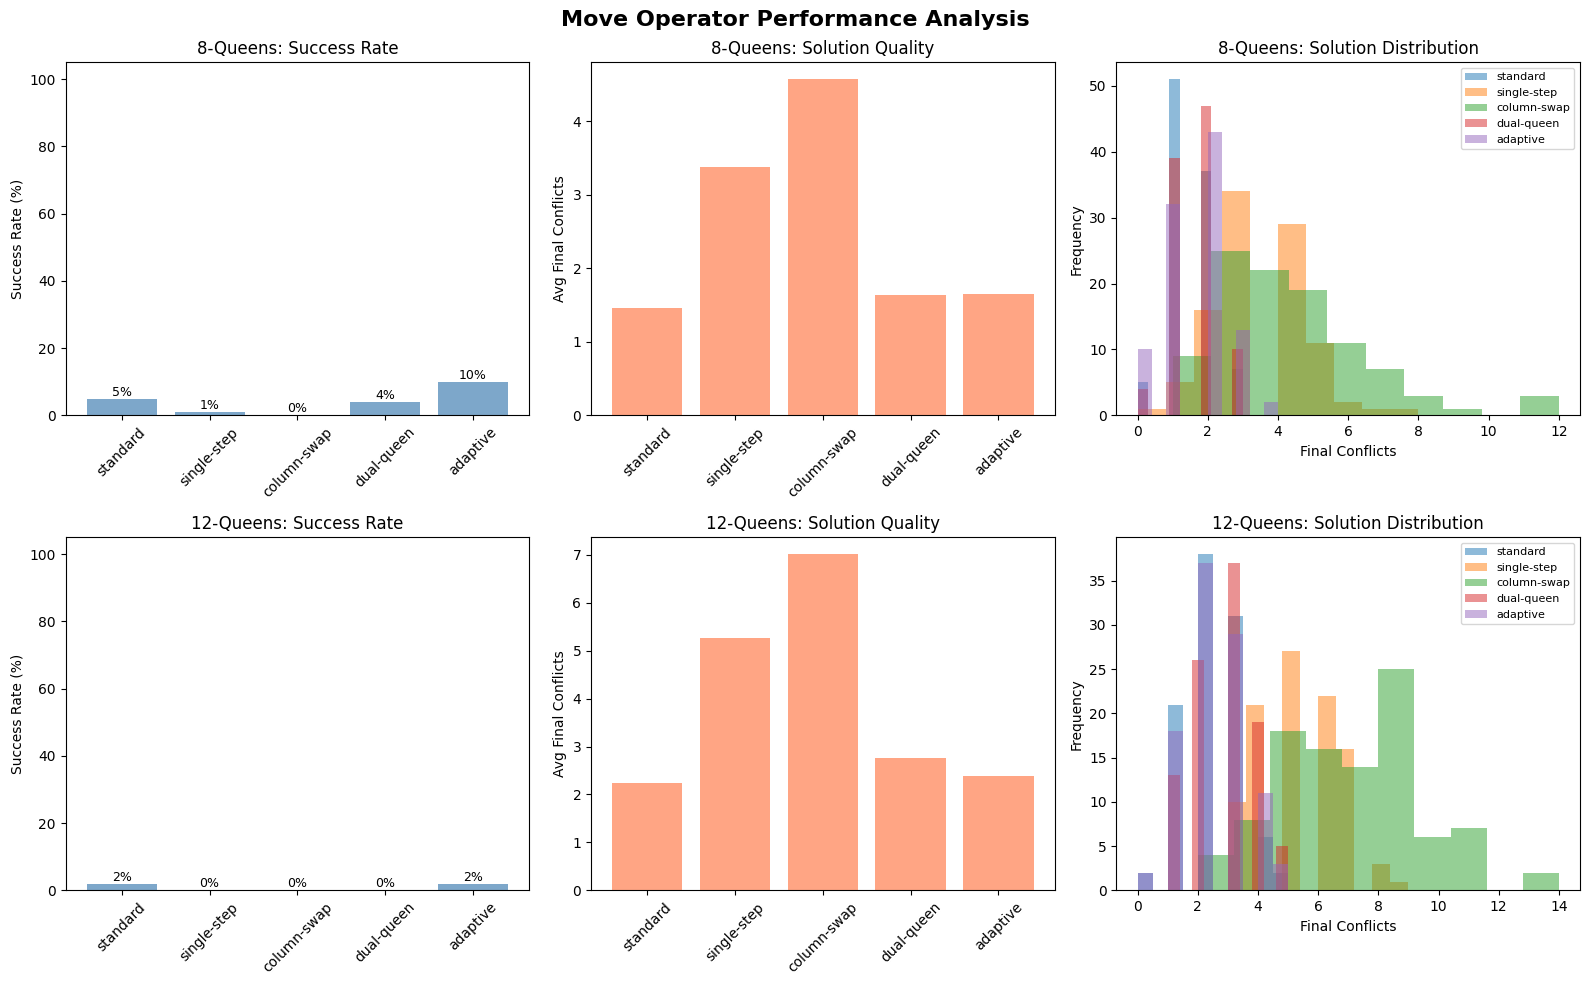


=== Convergence Comparison for 8-Queens ===


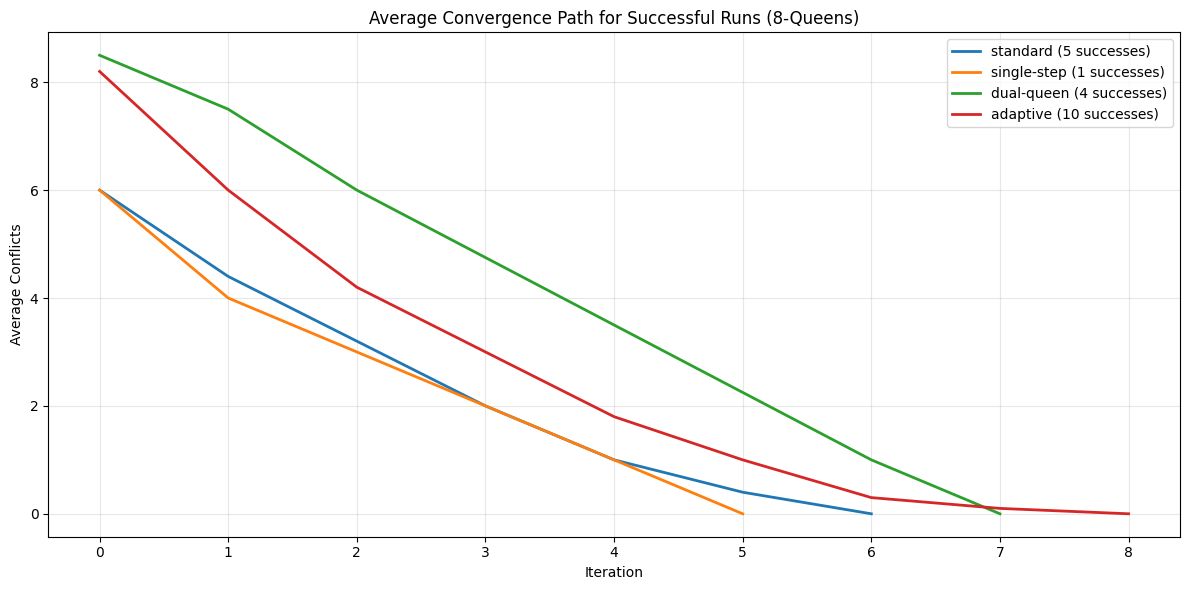

In [59]:
# Visualization of move operator performance
print("\n=== Move Operator Performance Visualization ===\n")

# Create comprehensive comparison plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Move Operator Performance Analysis', fontsize=16, fontweight='bold')

for idx, n in enumerate(test_sizes):
    # Success rates
    ax1 = axes[idx, 0]
    success_rates = [operator_results[f"{n}-{op}"]['success_rate'] for op in operators]
    bars = ax1.bar(operators, success_rates, color='steelblue', alpha=0.7)
    ax1.set_ylabel('Success Rate (%)')
    ax1.set_title(f'{n}-Queens: Success Rate')
    ax1.set_ylim(0, 105)
    ax1.tick_params(axis='x', rotation=45)
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}%', ha='center', va='bottom', fontsize=9)
    
    # Average conflicts
    ax2 = axes[idx, 1]
    avg_conflicts = [operator_results[f"{n}-{op}"]['avg_conflicts'] for op in operators]
    ax2.bar(operators, avg_conflicts, color='coral', alpha=0.7)
    ax2.set_ylabel('Avg Final Conflicts')
    ax2.set_title(f'{n}-Queens: Solution Quality')
    ax2.tick_params(axis='x', rotation=45)
    
    # Solution quality distribution
    ax3 = axes[idx, 2]
    for op in operators:
        histories = operator_results[f"{n}-{op}"]['histories']
        final_conflicts = [h[-1] for h in histories]
        ax3.hist(final_conflicts, alpha=0.5, label=op, bins=10)
    ax3.set_xlabel('Final Conflicts')
    ax3.set_ylabel('Frequency')
    ax3.set_title(f'{n}-Queens: Solution Distribution')
    ax3.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Average solution quality over iterations for successful runs
print("\n=== Convergence Comparison for 8-Queens ===")
fig, ax = plt.subplots(figsize=(12, 6))

for op in operators:
    histories = operator_results[f"8-{op}"]['histories']
    # Get only successful runs (reached 0 conflicts)
    successful = [h for h in histories if h[-1] == 0]
    
    if len(successful) > 0:
        # Find max length to align all histories
        max_len = max(len(h) for h in successful)
        # Average the histories (padding with final value)
        avg_history = []
        for i in range(max_len):
            values = [h[i] if i < len(h) else h[-1] for h in successful]
            avg_history.append(np.mean(values))
        
        ax.plot(avg_history, label=f"{op} ({len(successful)} successes)", linewidth=2)

ax.set_xlabel('Iteration')
ax.set_ylabel('Average Conflicts')
ax.set_title('Average Convergence Path for Successful Runs (8-Queens)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Advanced task: Exploring other Local Moves Operators

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### Move Operator Implementation 

Implement the following local move operators:

* Single-step move: Move one queen only one square up or down at a time
* Column swap: Exchange the positions of queens in two randomly selected columns
* Dual-queen move: Select two queens and move both simultaneously
* Adaptive move: Design your own operator that adapts which local move it uses based on the current state (e.g., focuses on queens with most conflicts or randomly chooses one of the moves above)

### Experimental Analysis

Using the 8-Queens and 12-Queens problems: Run your Stochastic Hill Climbing 2 implementation with each move operator 100 times
For each operator, create a visualization showing:

* Average solution quality over iterations
* Distribution of final solution qualities
* Average time to solution for successful runs

### Discussion

Describe what you have learned from the experiments. Which operator works best for which situation and why?

## More Things to Do (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. 

### Implement a Genetic Algorithm for the n-Queens problem

=== Genetic Algorithm for n-Queens Problem ===

Testing Genetic Algorithm on 8-Queens problem...

Best solution found at generation 73
Solution: [5 1 6 0 3 7 4 2]
Conflicts: 0
Fitness: 28
Board with 0 conflicts.


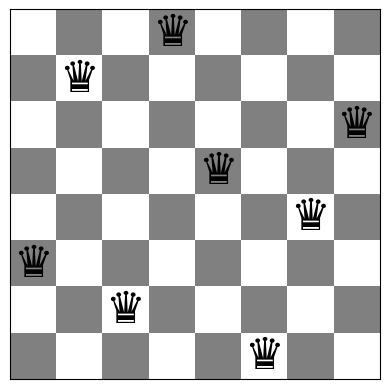

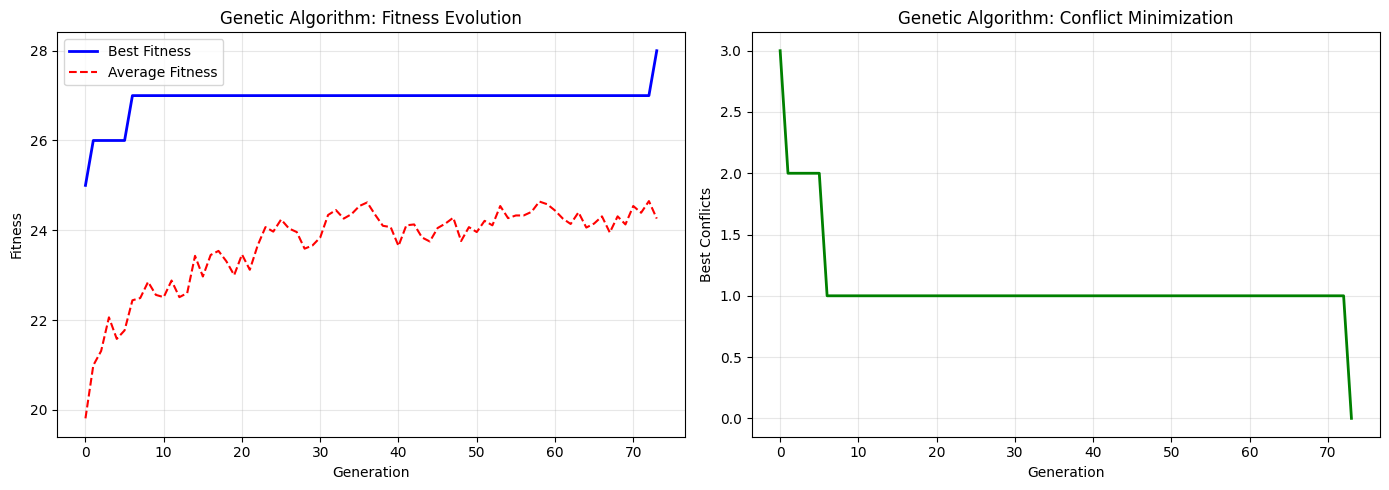

In [60]:
# Bonus: Genetic Algorithm for n-Queens Problem
print("=== Genetic Algorithm for n-Queens Problem ===\n")

def create_population(pop_size, n):
    """Create initial population of random boards"""
    return [random_board(n) for _ in range(pop_size)]

def fitness(board):
    """Fitness function - lower conflicts = higher fitness"""
    # We want to maximize fitness, so invert conflicts
    # Use max possible conflicts + 1 - actual conflicts
    n = len(board)
    max_conflicts = n * (n - 1) // 2  # Maximum possible conflicts
    return max_conflicts - conflicts(board)

def selection(population, fitnesses, k=3):
    """Tournament selection - select k individuals and return the best"""
    tournament_indices = np.random.choice(len(population), size=k, replace=False)
    tournament_fitnesses = [fitnesses[i] for i in tournament_indices]
    winner_idx = tournament_indices[np.argmax(tournament_fitnesses)]
    return population[winner_idx].copy()

def crossover(parent1, parent2):
    """Order crossover - preserve some positions from each parent"""
    n = len(parent1)
    # Single-point crossover
    crossover_point = np.random.randint(1, n)
    child = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
    return child

def mutate(board, mutation_rate=0.1):
    """Randomly change queen positions with given probability"""
    n = len(board)
    mutated = board.copy()
    for i in range(n):
        if np.random.random() < mutation_rate:
            mutated[i] = np.random.randint(n)
    return mutated

def genetic_algorithm(n, pop_size=100, max_generations=1000, mutation_rate=0.1, elitism=2):
    """
    Genetic algorithm for n-Queens problem.
    
    Args:
        n: Board size
        pop_size: Population size
        max_generations: Maximum number of generations
        mutation_rate: Probability of mutation per gene
        elitism: Number of best individuals to preserve
        
    Returns:
        tuple: (best_board, best_fitness, generation_found, fitness_history)
    """
    # Initialize population
    population = create_population(pop_size, n)
    fitness_history = []
    best_overall = None
    best_overall_fitness = -1
    generation_found = 0
    
    for generation in range(max_generations):
        # Evaluate fitness
        fitnesses = [fitness(board) for board in population]
        
        # Track best
        max_fitness = max(fitnesses)
        avg_fitness = np.mean(fitnesses)
        fitness_history.append({'max': max_fitness, 'avg': avg_fitness})
        
        best_idx = np.argmax(fitnesses)
        if fitnesses[best_idx] > best_overall_fitness:
            best_overall_fitness = fitnesses[best_idx]
            best_overall = population[best_idx].copy()
            generation_found = generation
        
        # Check if we found solution (0 conflicts)
        if conflicts(best_overall) == 0:
            break
        
        # Create new population
        new_population = []
        
        # Elitism - keep best individuals
        sorted_indices = np.argsort(fitnesses)[::-1]
        for i in range(elitism):
            new_population.append(population[sorted_indices[i]].copy())
        
        # Generate offspring
        while len(new_population) < pop_size:
            # Select parents
            parent1 = selection(population, fitnesses)
            parent2 = selection(population, fitnesses)
            
            # Crossover
            child = crossover(parent1, parent2)
            
            # Mutation
            child = mutate(child, mutation_rate)
            
            new_population.append(child)
        
        population = new_population
    
    return best_overall, best_overall_fitness, generation_found, fitness_history

# Test Genetic Algorithm on 8-Queens
print("Testing Genetic Algorithm on 8-Queens problem...")
best_solution, best_fit, gen_found, history = genetic_algorithm(
    n=8, 
    pop_size=100, 
    max_generations=500, 
    mutation_rate=0.15,
    elitism=3
)

print(f"\nBest solution found at generation {gen_found}")
print(f"Solution: {best_solution}")
print(f"Conflicts: {conflicts(best_solution)}")
print(f"Fitness: {best_fit}")

# Visualize the solution
show_board(best_solution, fontsize=32)

# Plot fitness evolution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

generations = range(len(history))
max_fitness = [h['max'] for h in history]
avg_fitness = [h['avg'] for h in history]

ax1.plot(generations, max_fitness, 'b-', label='Best Fitness', linewidth=2)
ax1.plot(generations, avg_fitness, 'r--', label='Average Fitness', linewidth=1.5)
ax1.set_xlabel('Generation')
ax1.set_ylabel('Fitness')
ax1.set_title('Genetic Algorithm: Fitness Evolution')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Convert fitness to conflicts for better visualization
max_conflicts_possible = 8 * 7 // 2
conflicts_history = [max_conflicts_possible - h['max'] for h in history]
ax2.plot(generations, conflicts_history, 'g-', linewidth=2)
ax2.set_xlabel('Generation')
ax2.set_ylabel('Best Conflicts')
ax2.set_title('Genetic Algorithm: Conflict Minimization')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)

=== Comparing Genetic Algorithm with Local Search ===

Algorithm                 Avg Time (ms)   Avg Conflicts   Success Rate   
----------------------------------------------------------------------
Genetic Algorithm         165.02          0.02            98.0           %
Simulated Annealing       2.13            1.26            10.0           %
Steepest-Ascent HC        (see Task 6)    (see Task 6)    (see Task 6)   


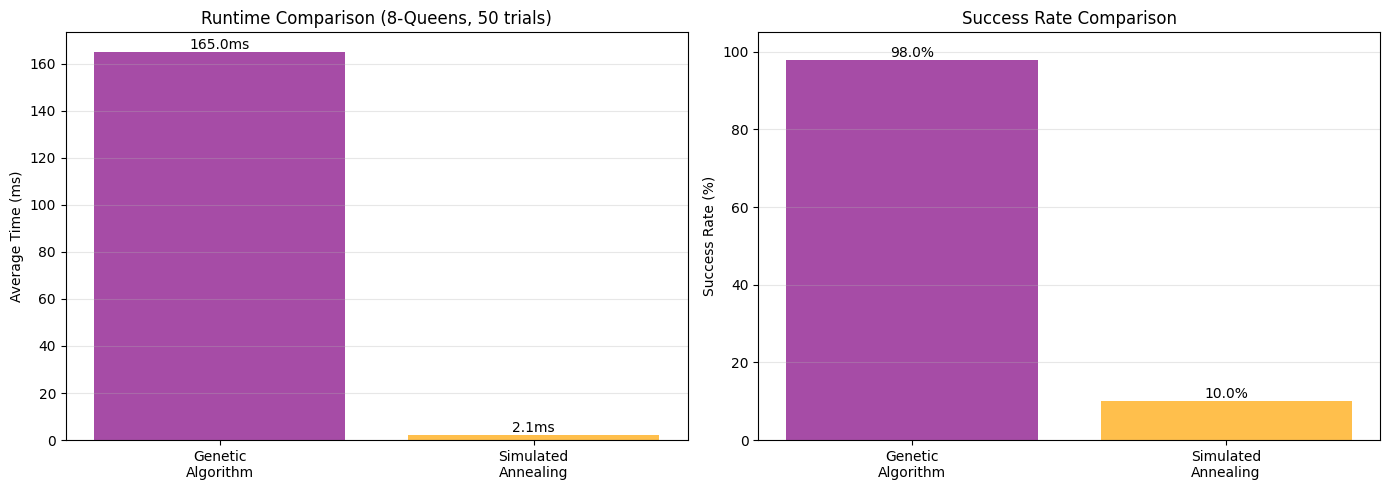


### Analysis:

**Genetic Algorithm:**
- Uses population-based search with crossover and mutation
- Can explore multiple areas of search space simultaneously
- Slower per iteration due to population management
- Less likely to get stuck in local optima due to diversity
- Better for larger problem sizes where local search struggles

**Local Search (Hill Climbing & Simulated Annealing):**
- Single-point search through state space
- Faster per iteration, simpler implementation
- Can get stuck in local optima (hill climbing)
- Simulated annealing adds randomness to escape local optima
- Generally faster for small to medium problem sizes

**Key Insights:**
- For 8-Queens, local search methods are typically faster
- Genetic algorithms excel when problem has many local optima
- GA is more robust but has higher computational overhead
- Simulated annealing provides good balance of speed and robustness


In [61]:
# Compare GA with local search methods
print("=== Comparing Genetic Algorithm with Local Search ===\n")

# Test both on 8-Queens problem
n_trials = 50
board_size = 8

# Genetic Algorithm results
ga_times = []
ga_conflicts = []
ga_success = 0

for _ in range(n_trials):
    start = time.perf_counter()
    best, fit, gen, hist = genetic_algorithm(board_size, pop_size=100, max_generations=500, mutation_rate=0.15)
    end = time.perf_counter()
    
    ga_times.append(end - start)
    conf = conflicts(best)
    ga_conflicts.append(conf)
    if conf == 0:
        ga_success += 1

# Simulated Annealing results
sa_times = []
sa_conflicts = []
sa_success = 0

for _ in range(n_trials):
    board = random_board(board_size)
    start = time.perf_counter()
    result, _, _ = sa_wrapper(board)
    end = time.perf_counter()
    
    sa_times.append(end - start)
    conf = conflicts(result)
    sa_conflicts.append(conf)
    if conf == 0:
        sa_success += 1

# Print comparison
print(f"{'Algorithm':<25} {'Avg Time (ms)':<15} {'Avg Conflicts':<15} {'Success Rate':<15}")
print("-" * 70)
print(f"{'Genetic Algorithm':<25} {np.mean(ga_times)*1000:<15.2f} {np.mean(ga_conflicts):<15.2f} {ga_success/n_trials*100:<15.1f}%")
print(f"{'Simulated Annealing':<25} {np.mean(sa_times)*1000:<15.2f} {np.mean(sa_conflicts):<15.2f} {sa_success/n_trials*100:<15.1f}%")
print(f"{'Steepest-Ascent HC':<25} {'(see Task 6)':<15} {'(see Task 6)':<15} {'(see Task 6)':<15}")

# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Time comparison
algorithms = ['Genetic\nAlgorithm', 'Simulated\nAnnealing']
times = [np.mean(ga_times)*1000, np.mean(sa_times)*1000]
bar_colors = ['purple', 'orange']

bars = ax1.bar(algorithms, times, color=bar_colors, alpha=0.7)
ax1.set_ylabel('Average Time (ms)')
ax1.set_title('Runtime Comparison (8-Queens, 50 trials)')
ax1.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}ms', ha='center', va='bottom')

# Success rate comparison
success_rates = [ga_success/n_trials*100, sa_success/n_trials*100]
bars2 = ax2.bar(algorithms, success_rates, color=bar_colors, alpha=0.7)
ax2.set_ylabel('Success Rate (%)')
ax2.set_title('Success Rate Comparison')
ax2.set_ylim(0, 105)
ax2.grid(True, alpha=0.3, axis='y')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n### Analysis:\n")
print("**Genetic Algorithm:**")
print("- Uses population-based search with crossover and mutation")
print("- Can explore multiple areas of search space simultaneously")
print("- Slower per iteration due to population management")
print("- Less likely to get stuck in local optima due to diversity")
print("- Better for larger problem sizes where local search struggles\n")

print("**Local Search (Hill Climbing & Simulated Annealing):**")
print("- Single-point search through state space")
print("- Faster per iteration, simpler implementation")
print("- Can get stuck in local optima (hill climbing)")
print("- Simulated annealing adds randomness to escape local optima")
print("- Generally faster for small to medium problem sizes\n")

print("**Key Insights:**")
print("- For 8-Queens, local search methods are typically faster")
print("- Genetic algorithms excel when problem has many local optima")
print("- GA is more robust but has higher computational overhead")
print("- Simulated annealing provides good balance of speed and robustness")

### Comparing Genetic Algorithm with Local Search Methods